In [ ]:
import pandas as pd
# Path to your original data file
original_data_path = 'C:\\Users\\sumey\\Desktop\\temer realstate\\analysis_1\\social_media_analysis_pipline\\files\\final_data_with_reel.xlsx'

# Path to your updated engagement rate file
updated_data_path = 'C:\\Users\\sumey\\Desktop\\temer realstate\\analysis_1\\social_media_analysis_pipline\\files\\updated_facebook_data.xlsx'

# Load the data into DataFrames
original_data = pd.read_excel(original_data_path)
updated_data = pd.read_excel(updated_data_path)


In [1]:
# Merge using both 'company_name' and 'week_number' as keys
merged_data = pd.merge(original_data, updated_data[['company_name', 'week_number', 'facebook_post_engagement_rate']], 
                       on=['company_name', 'week_number'], how='left')



NameError: name 'pd' is not defined

In [ ]:
# Display the first few rows to confirm the merge
print(merged_data.head())
# Specify the path to save the merged data
output_path = 'C:\\Users\\sumey\\Desktop\\temer realstate\\analysis_1\\social_media_analysis_pipline\\files\\merged_data.xlsx'
merged_data.to_excel(output_path, index=False)


               company_name twitter_followers twitter_following  \
0          TEMER Properties                10                 3   
1          Ayat Real Estate                16                38   
2  Metropolitan Real Estate               173                27   
3       Amibara Real Estate                14                15   
4          Noah Real Estate               153                10   

  twitter_all_tweets twitter_retweets twitter_likes_of_company_tweets  \
0                  0                0                               0   
1                  0                0                               0   
2                  0                0                               0   
3                  0                0                               0   
4                  0                0                               0   

  twitter_tweet_engagement_total twitter_average_engagement_total_per_tweet  \
0                              0                                          0   


In [1]:
import pandas as pd
data=pd.read_excel(r'C:\\Users\\sumey\\Desktop\\temer realstate\\analysis_1\\social_media_analysis_pipline\\files\\merged_data.xlsx')

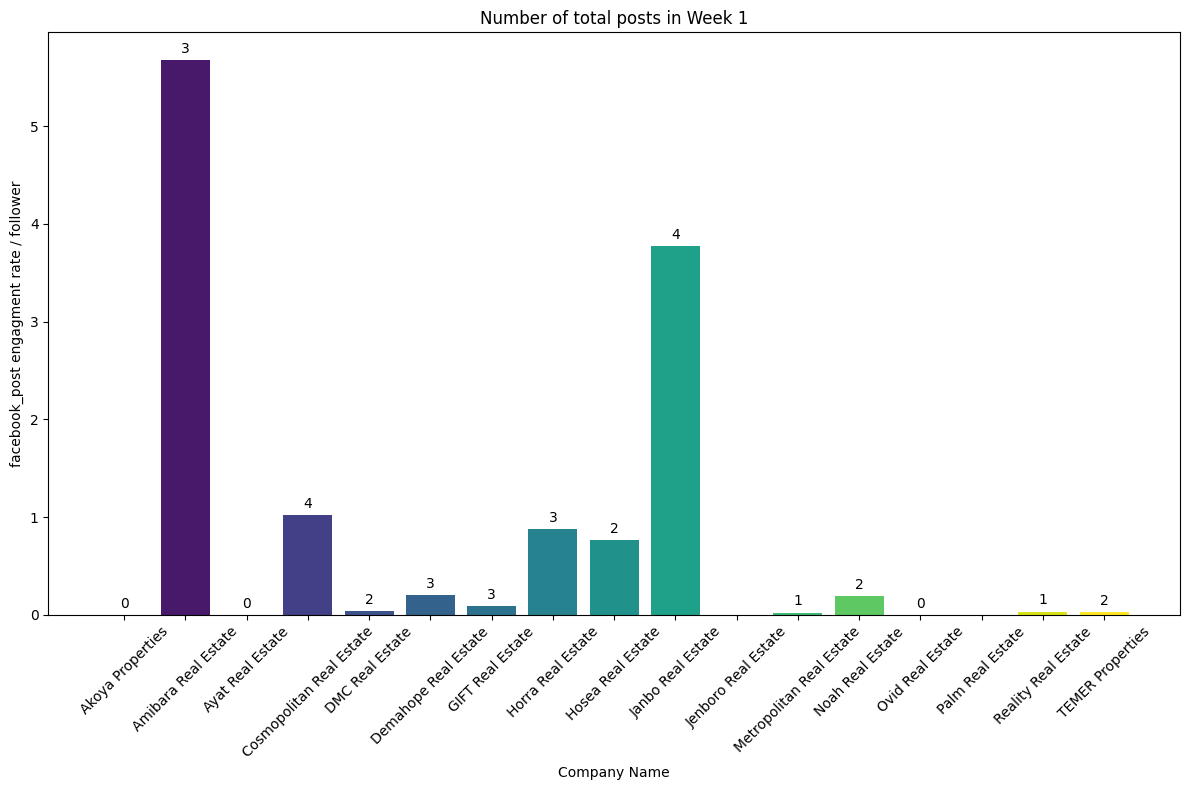

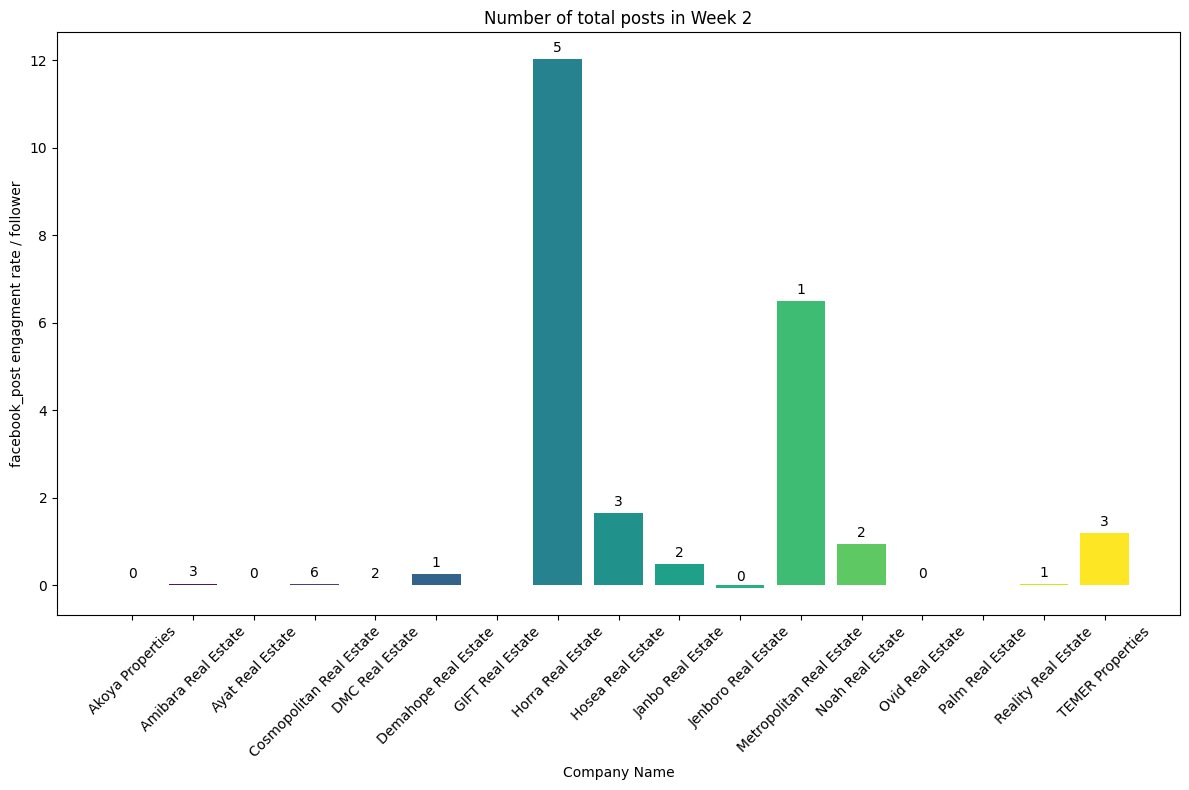

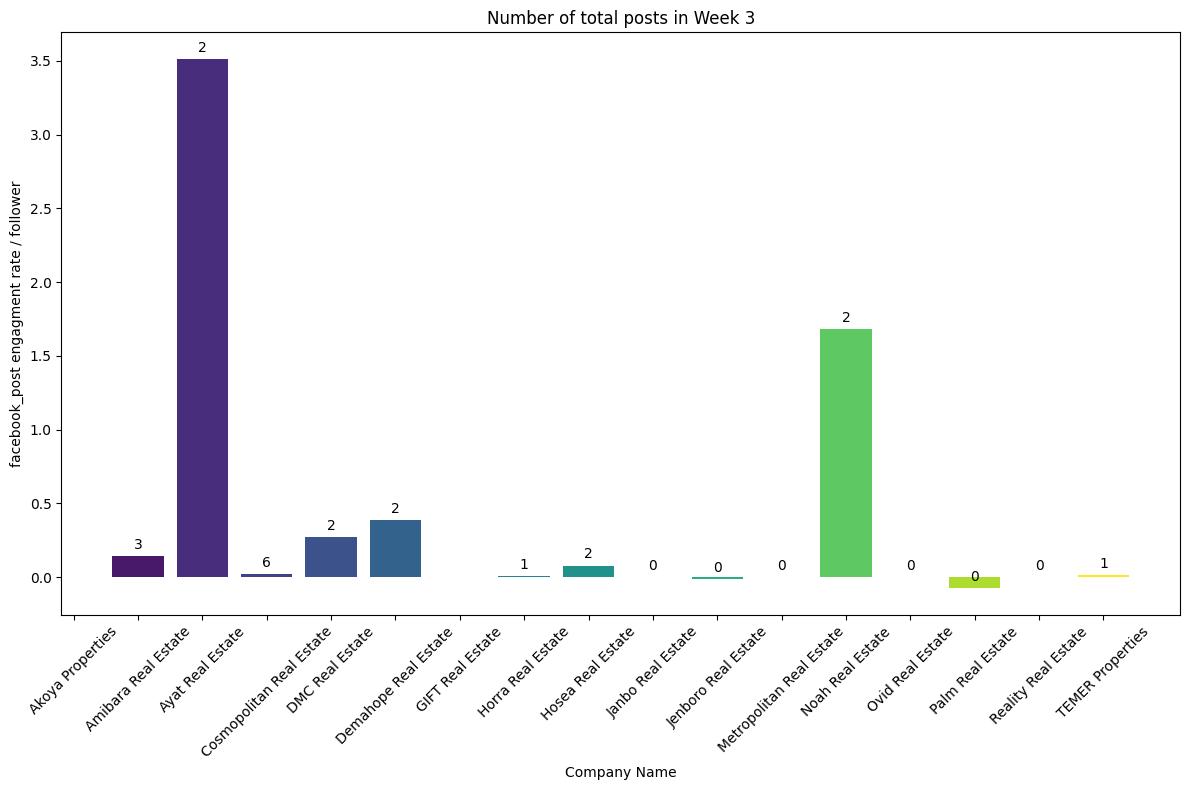

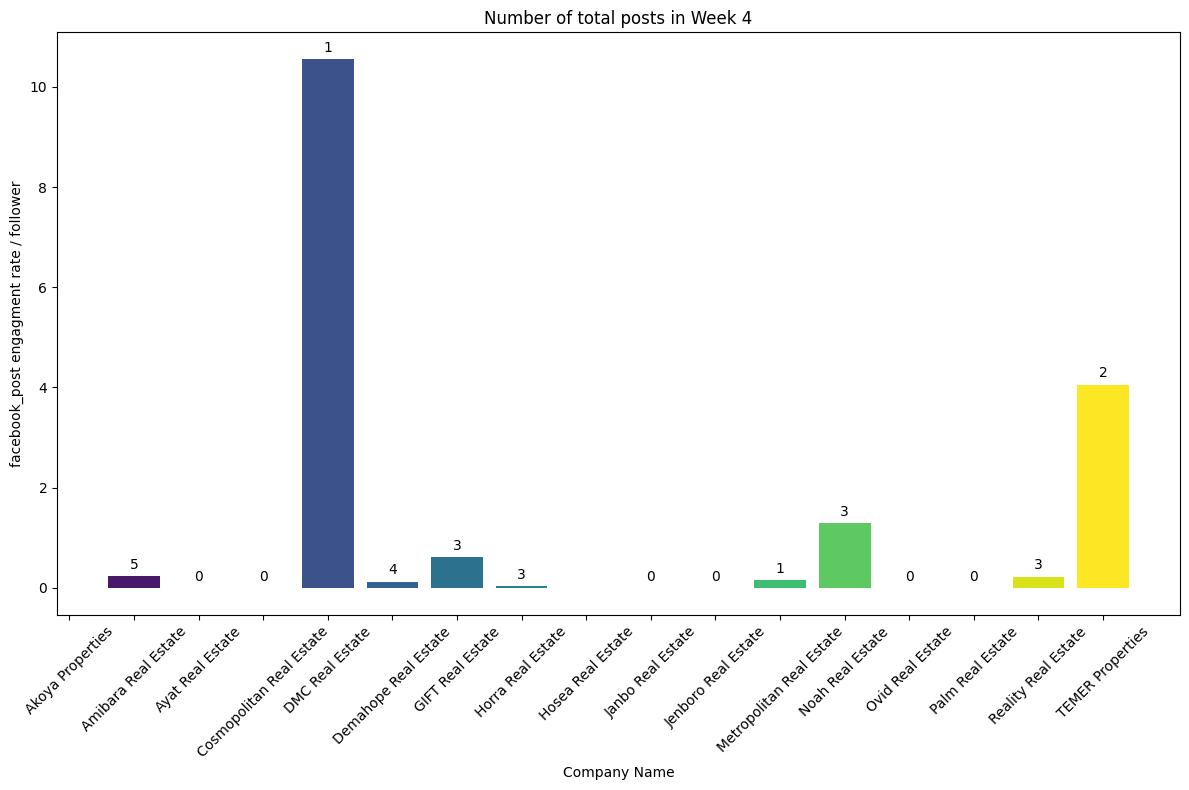

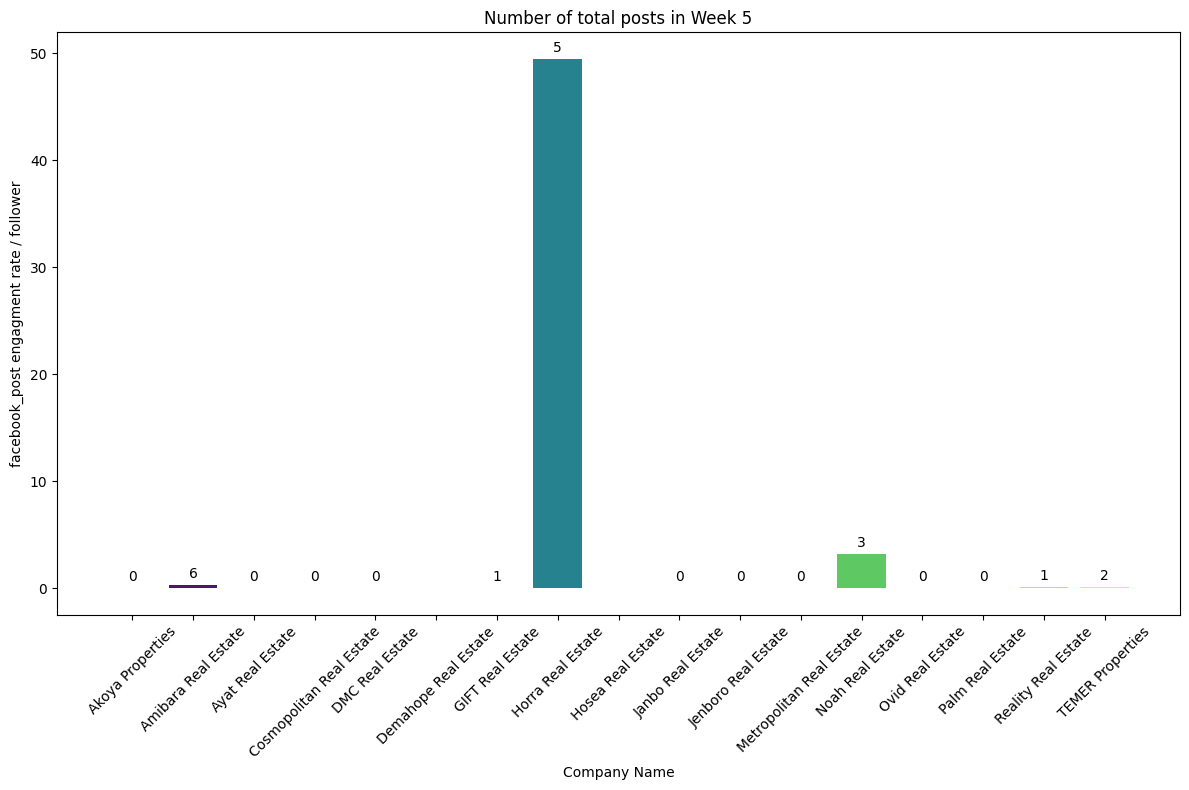

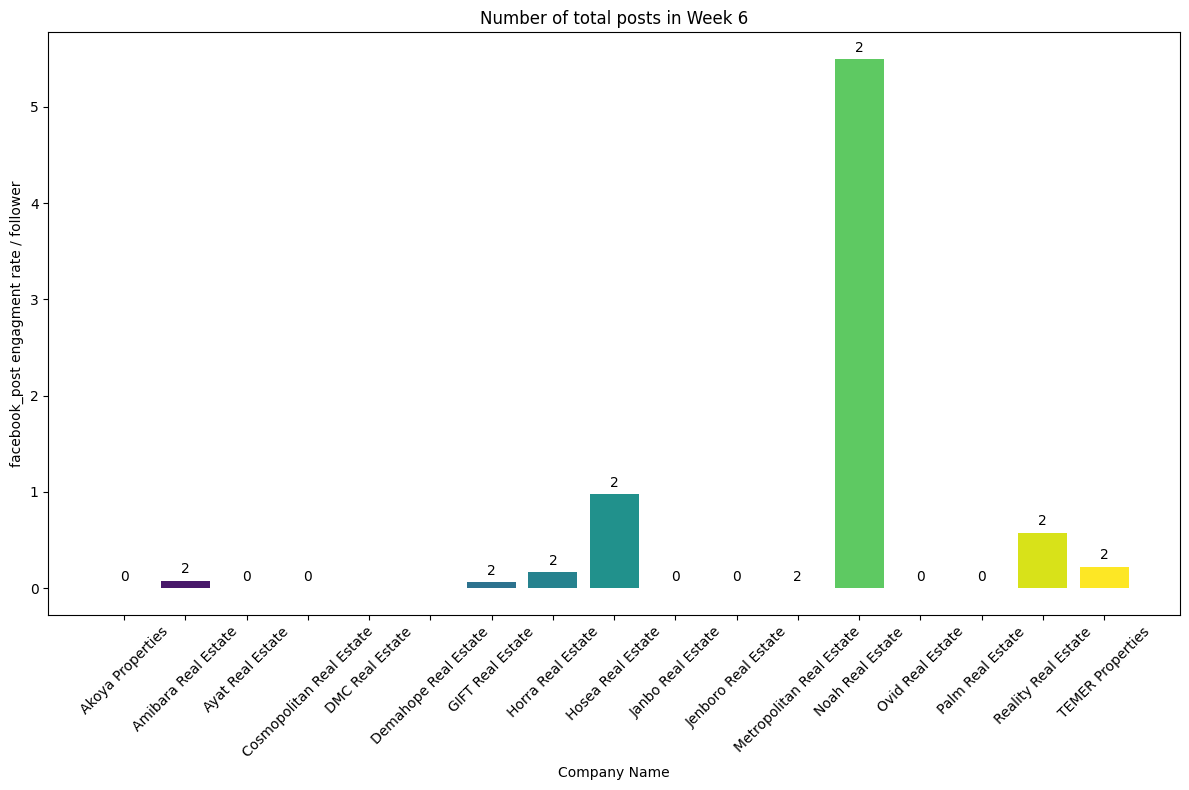

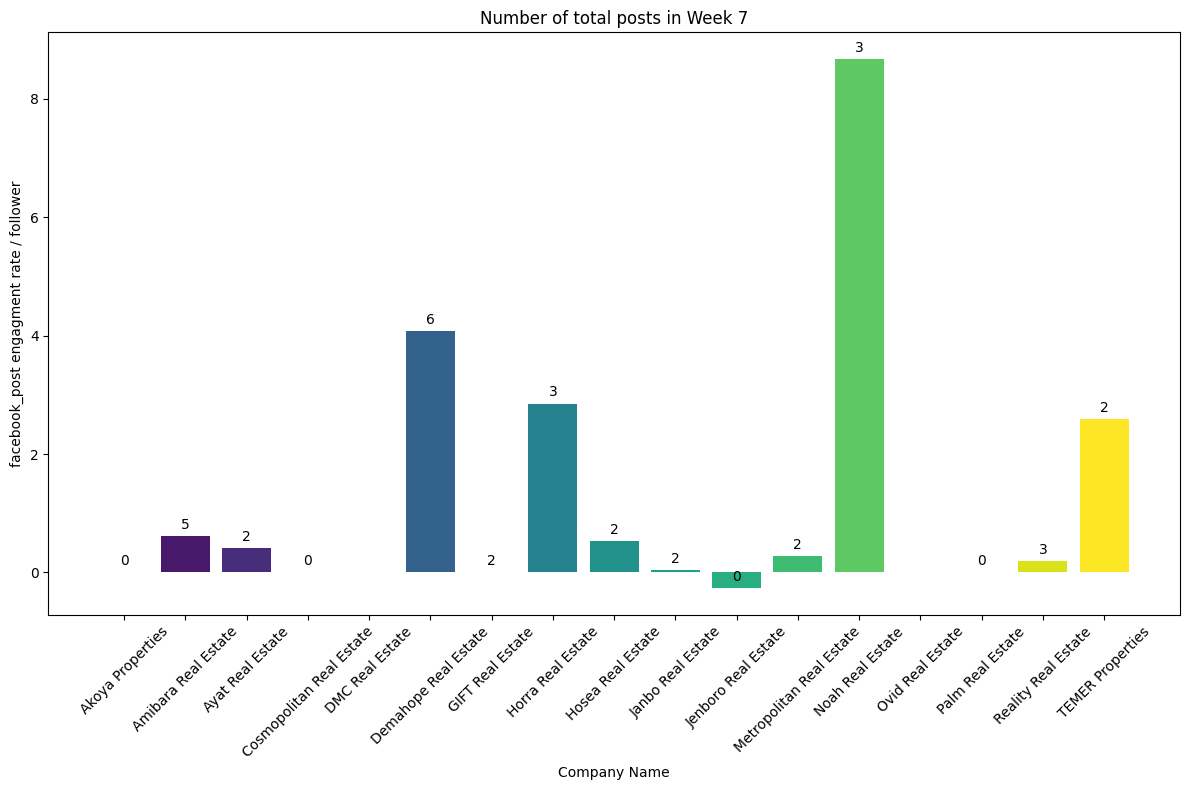

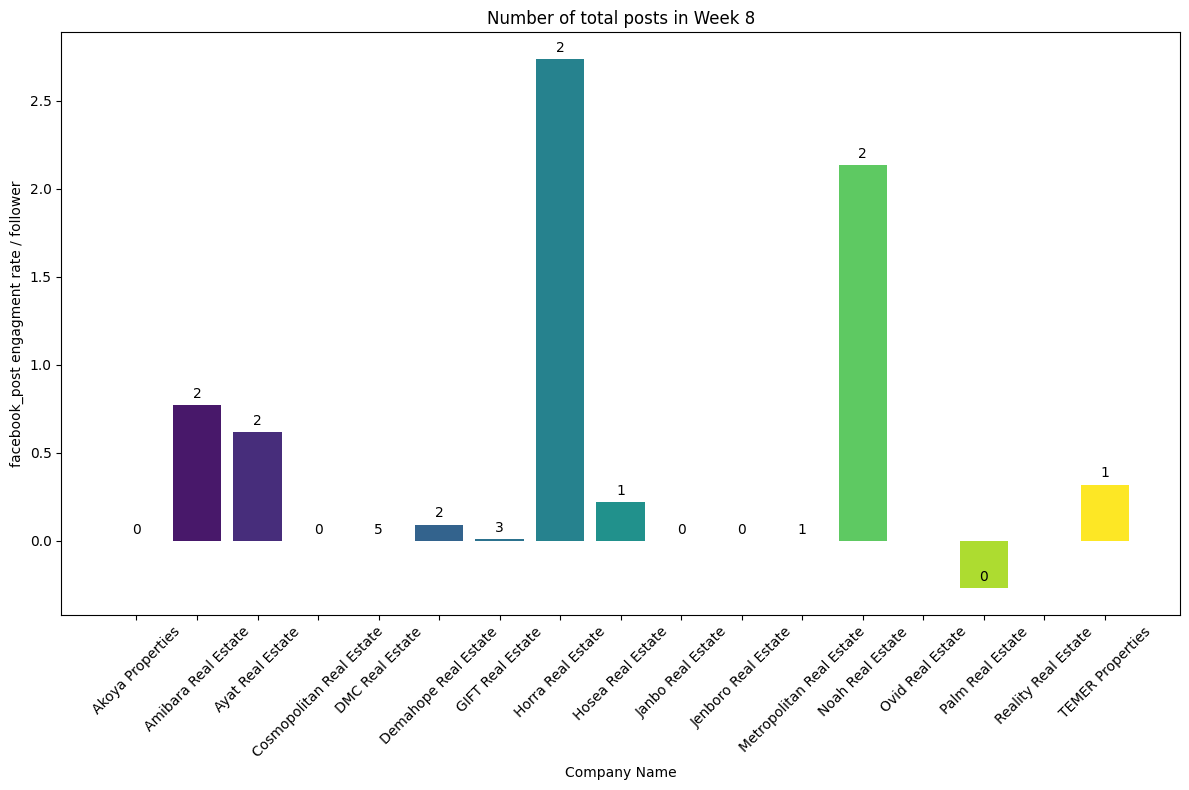

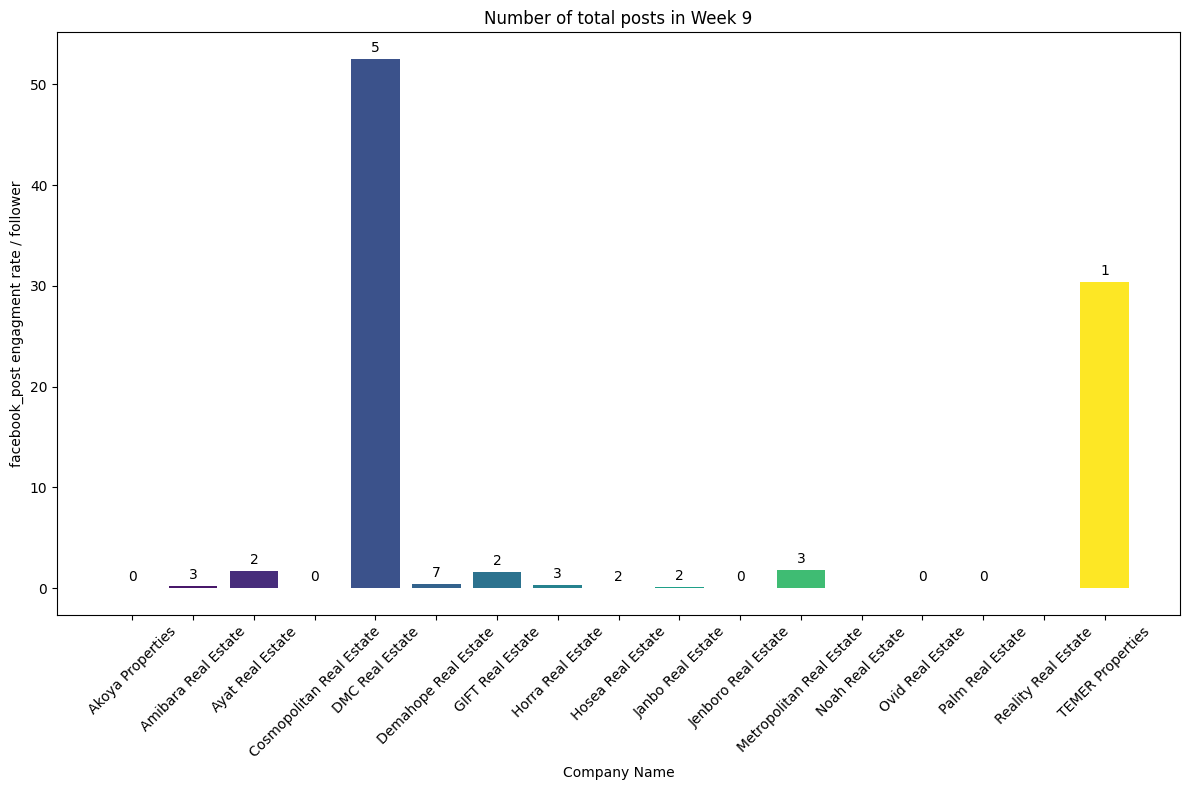

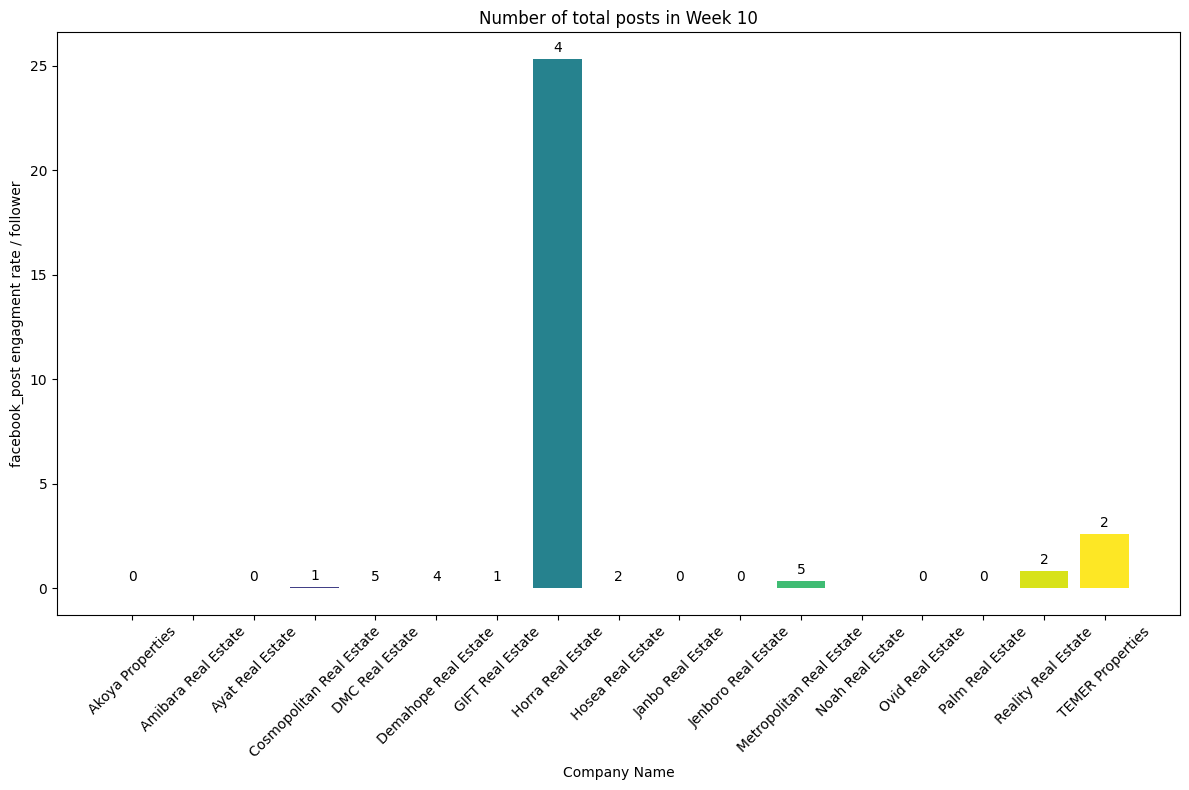

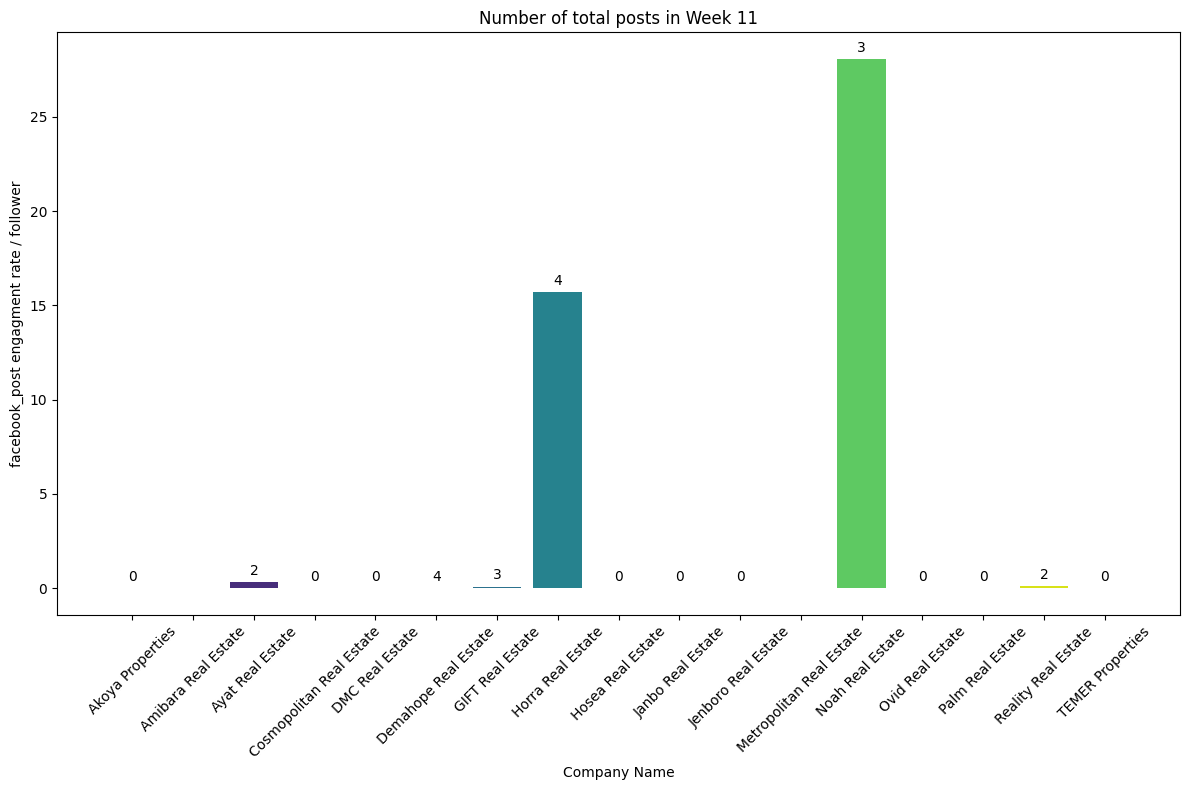

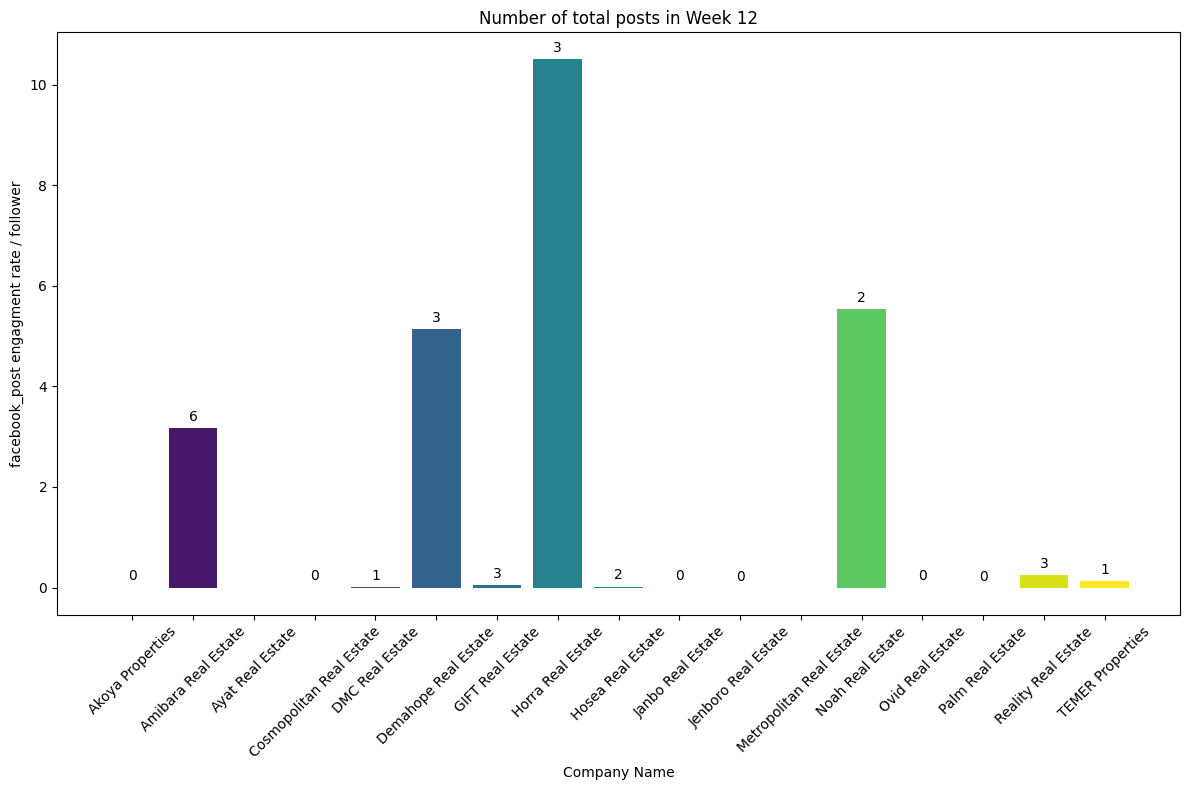

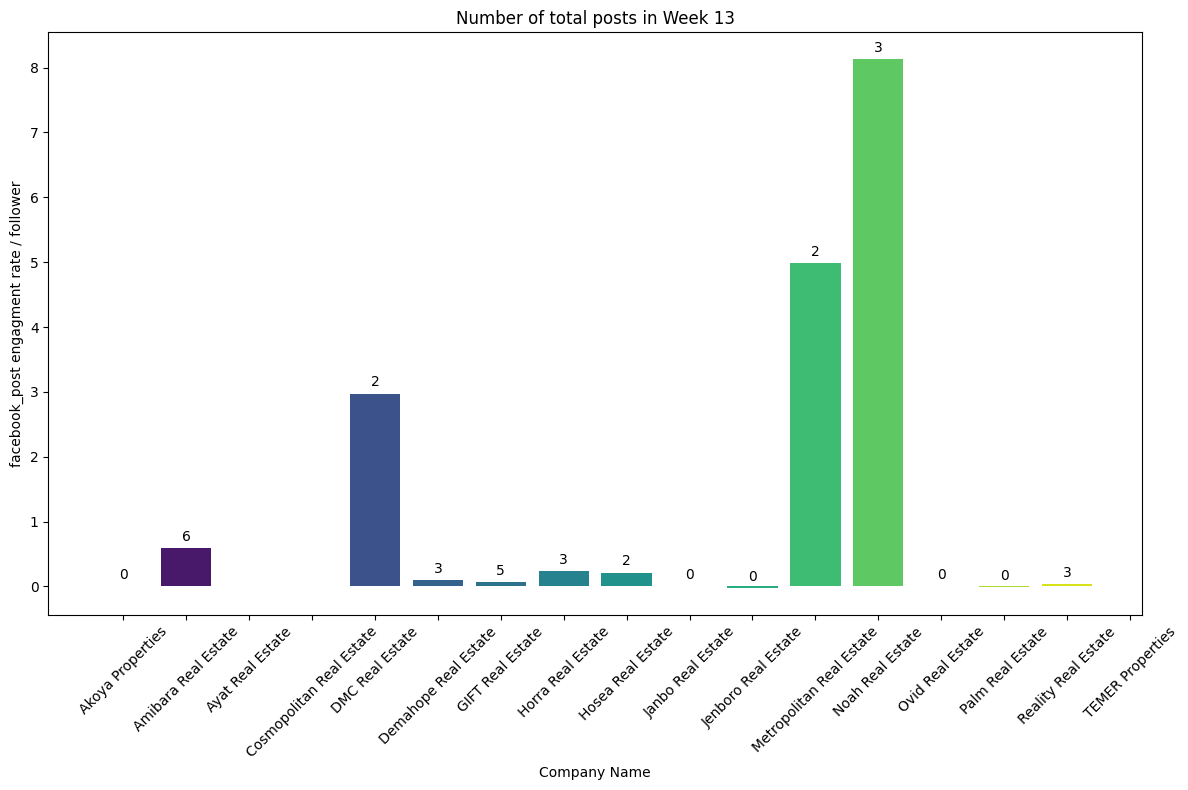

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Determine unique week numbers
week_numbers = data['week_number'].unique()

# Plotting one graph per week number
for week in week_numbers:
    week_data = data[data['week_number'] == week]
    
    # Sort data by company name for consistent plotting
    week_data = week_data.sort_values(by='company_name')
    
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.bar(week_data['company_name'], week_data['facebook_post_engagement_rate_y'], color=plt.cm.viridis(np.linspace(0, 1, len(week_data))))
    plt.title(f'Number of total posts in Week {week}')
    plt.xlabel('Company Name')
    plt.ylabel('facebook_post engagment rate / follower')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Annotate number of views on top of each bar
    for bar, view_count in zip(bars, week_data['facebook_post_total']):
        ax.annotate(f'{view_count}', 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    plt.show()

In [10]:
import pandas as pd


# Find the maximum value of 'facebook_post_engagement_rate_y' in the dataset
max_engagement_rate = data['facebook_post_engagement_rate_y'].max()

# Function to categorize based on percentage of maximum
def categorize_based_on_percentage(value):
    percentage = (value / max_engagement_rate) * 100
    if percentage >= 80:
        return '80-100%'
    elif percentage >= 60:
        return '60-80%'
    elif percentage >= 40:
        return '40-60%'
    elif percentage >= 20:
        return '20-40%'
    elif percentage > 0:
        return '0-20%'
    else:
        return '0%'  # for exactly 0 values

# Apply the function to the engagement rate column
data['engagement_rate_category'] = data['facebook_post_engagement_rate_y'].apply(categorize_based_on_percentage)

# Print the first few rows to verify the categories
print(data[['facebook_post_engagement_rate_y', 'engagement_rate_category']].head())



# Define the thresholds for 'facebook_post_total'
post_totals = [5, 4, 3, 2, 1, 0]

# Calculate the distribution of engagement rate categories for each post total threshold
results = {}

for post_total in post_totals:
    # Filter data for posts with 'facebook_post_total' >= current threshold
    filtered_data = data[data['facebook_post_total'] >= post_total]
    
    # Count the number of entries in each engagement rate category
    category_counts = filtered_data['engagement_rate_category'].value_counts(normalize=True) * 100
    
    # Store the result
    results[post_total] = category_counts

# Print the results
for post_total, distribution in results.items():
    print(f"\nDistribution of engagement rate categories for 'facebook_post_total' >= {post_total}:")
    print(distribution)



   facebook_post_engagement_rate_y engagement_rate_category
0                         0.024287                    0-20%
1                         0.000000                       0%
2                         0.022701                    0-20%
3                         5.675676                    0-20%
4                         0.192024                    0-20%

Distribution of engagement rate categories for 'facebook_post_total' >= 5:
engagement_rate_category
0-20%      57.894737
0%         26.315789
80-100%    10.526316
20-40%      5.263158
Name: proportion, dtype: float64

Distribution of engagement rate categories for 'facebook_post_total' >= 4:
engagement_rate_category
0-20%      55.172414
0%         27.586207
20-40%      6.896552
80-100%     6.896552
40-60%      3.448276
Name: proportion, dtype: float64

Distribution of engagement rate categories for 'facebook_post_total' >= 3:
engagement_rate_category
0-20%      67.692308
0%         21.538462
20-40%      4.615385
80-100%     3.07692

In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame and it's already loaded with the data

# Determine the total number of weeks in the dataset - assuming the full data covers 13 weeks
total_weeks = 13

# Group by 'company_name' and 'week_number', count posts per week where posts are greater than zero
grouped_data = data[data['facebook_post_total'] > 0].groupby(['company_name', 'week_number']).size().reset_index(name='posts')

# Count the number of weeks each company posted at least once
active_weeks_count = grouped_data.groupby('company_name')['week_number'].nunique()

# Create a DataFrame to include companies that never posted
all_companies = pd.DataFrame(data['company_name'].unique(), columns=['company_name'])
merged_data = all_companies.merge(active_weeks_count, on='company_name', how='left').fillna(0)

# Rename columns for clarity
merged_data.columns = ['company_name', 'active_weeks_count']

# Sort companies by the number of weeks they posted, in descending order
merged_data['active_weeks_count'] = merged_data['active_weeks_count'].astype(int)  # Ensure it's integer for sorting
sorted_companies = merged_data.sort_values(by='active_weeks_count', ascending=False)

# Display the sorted companies with their posting count
print("Companies sorted by their consistency in posting (from most consistent to least):")
for index, row in sorted_companies.iterrows():
    company = row['company_name']
    weeks_posted = row['active_weeks_count']
    if weeks_posted > 0:
        print(f"{company}: posted for {weeks_posted} weeks")
    else:
        print(f"{company}: never posted")


Companies sorted by their consistency in posting (from most consistent to least):
Demahope Real Estate: posted for 13 weeks
Horra Real Estate: posted for 13 weeks
Amibara Real Estate: posted for 13 weeks
Noah Real Estate: posted for 13 weeks
Hosea Real Estate: posted for 12 weeks
GIFT Real Estate: posted for 12 weeks
TEMER Properties: posted for 12 weeks
Reality Real Estate: posted for 12 weeks
DMC Real Estate: posted for 11 weeks
Metropolitan Real Estate: posted for 11 weeks
Ayat Real Estate: posted for 5 weeks
Janbo Real Estate: posted for 4 weeks
Cosmopolitan Real Estate: posted for 4 weeks
Ovid Real Estate: never posted
Akoya Properties: never posted
Palm Real Estate: never posted
Jenboro Real Estate: never posted


In [12]:
import pandas as pd

# Assuming 'data' is your DataFrame and it's already loaded with the data

# Aggregate the total and average engagement rates for each company
aggregated_data = data.groupby('company_name')['facebook_post_engagement_rate_y'].agg(['sum', 'mean']).reset_index()

# Find the maximum value of 'facebook_post_engagement_rate_y' in the dataset (using the mean for maximum comparison)
max_engagement_rate = aggregated_data['mean'].max()

# Function to categorize based on percentage of maximum mean engagement rate
def categorize_based_on_percentage(value):
    percentage = (value / max_engagement_rate) * 100
    if percentage >= 80:
        return '80-100%'
    elif percentage >= 60:
        return '60-80%'
    elif percentage >= 40:
        return '40-60%'
    elif percentage >= 20:
        return '20-40%'
    elif percentage > 0:
        return '0-20%'
    else:
        return '0%'  # for exactly 0 values

# Apply the function to the 'mean' column to categorize each company
aggregated_data['engagement_rate_category'] = aggregated_data['mean'].apply(categorize_based_on_percentage)

# Print the aggregated data with categories
print(aggregated_data[['company_name', 'sum', 'mean', 'engagement_rate_category']])


                company_name         sum      mean engagement_rate_category
0           Akoya Properties    0.000000  0.000000                       0%
1        Amibara Real Estate   11.768403  1.069855                    0-20%
2           Ayat Real Estate    6.565421  0.596856                    0-20%
3   Cosmopolitan Real Estate    1.128592  0.094049                    0-20%
4            DMC Real Estate   66.376226  6.034202                   60-80%
5       Demahope Real Estate   10.815688  0.983244                    0-20%
6           GIFT Real Estate    2.624309  0.238574                    0-20%
7          Horra Real Estate  120.312659  9.254820                  80-100%
8          Hosea Real Estate    4.481271  0.407388                    0-20%
9          Janbo Real Estate    4.414482  0.339576                    0-20%
10       Jenboro Real Estate   -0.449980 -0.037498                       0%
11  Metropolitan Real Estate   14.103309  1.282119                    0-20%
12          

In [18]:
import pandas as pd

# Assuming 'data' is your DataFrame and it's already loaded with the data

# Convert columns to numeric, coercing errors which will turn non-convertible values into NaN
data['facebook_post_engagement_total'] = pd.to_numeric(data['facebook_post_engagement_total'], errors='coerce')
data['facebook_engagement_total'] = pd.to_numeric(data['facebook_engagement_total'], errors='coerce')

# Apply the condition to adjust engagement data and track the source of engagement data
data['adjusted_engagement'] = data.apply(
    lambda row: row['facebook_post_engagement_total'] if row['facebook_engagement_total'] == 0 else row['facebook_engagement_total'],
    axis=1
)

# Identify which engagement source was used
data['engagement_source'] = data.apply(
    lambda row: 'Post Engagement Total' if row['facebook_engagement_total'] == 0 else 'Engagement Total',
    axis=1
)

# Aggregate the adjusted total and average engagement rates for each company
aggregated_data = data.groupby('company_name').agg(
    total_adjusted_engagement=('adjusted_engagement', 'sum'),
    mean_adjusted_engagement=('adjusted_engagement', 'mean'),
    engagement_source=('engagement_source', lambda x: x.mode()[0])  # Most frequent source used, if consistent
).reset_index()

# Print the aggregated data with source information
print(aggregated_data.to_string(index=False))


            company_name  total_adjusted_engagement  mean_adjusted_engagement     engagement_source
        Akoya Properties                        0.0                  0.000000 Post Engagement Total
     Amibara Real Estate                      365.0                 28.076923 Post Engagement Total
        Ayat Real Estate                      199.0                 15.307692 Post Engagement Total
Cosmopolitan Real Estate                      129.0                  9.923077 Post Engagement Total
         DMC Real Estate                     7223.0                555.615385 Post Engagement Total
    Demahope Real Estate                      410.0                 31.538462      Engagement Total
        GIFT Real Estate                      198.0                 15.230769 Post Engagement Total
       Horra Real Estate                     4388.0                337.538462 Post Engagement Total
       Hosea Real Estate                      315.0                 24.230769 Post Engagement Total


In [19]:
import pandas as pd

# Assuming 'data' is your DataFrame and it's already loaded with the data

# Group the data by company name
grouped_by_company = data.groupby('company_name')

# Function to check if all engagement totals are zero
def all_zeros(group):
    return (group['facebook_engagement_total'] == 0).all()

# Apply the function across groups and filter companies where all engagement totals are zero
companies_with_all_zeros = grouped_by_company.filter(all_zeros)

# If needed, get unique company names from the filtered results
unique_companies_with_all_zeros = companies_with_all_zeros['company_name'].unique()

# Print the list of companies with zero engagement total for all weeks
print("Companies with zero 'facebook_engagement_total' for all weeks:")
for company in unique_companies_with_all_zeros:
    print(company)


Companies with zero 'facebook_engagement_total' for all weeks:
Ayat Real Estate
Noah Real Estate
Ovid Real Estate
Akoya Properties
Palm Real Estate
Jenboro Real Estate
Janbo Real Estate
Horra Real Estate


In [5]:
# Assuming the column names are exactly 'facebook_post_engagement_rate_y' and 'facebook_total_post'
# Ensure that the 'facebook_total_post' column is named correctly as per your dataset. If not, adjust the column name accordingly.
selected_data = data[['facebook_post_engagement_rate_y', 'facebook_post_total']]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)


                                 facebook_post_engagement_rate_y  \
facebook_post_engagement_rate_y                          1.00000   
facebook_post_total                                      0.30002   

                                 facebook_post_total  
facebook_post_engagement_rate_y              0.30002  
facebook_post_total                          1.00000  


In [6]:
# Group the data by 'week_number' and then apply the correlation calculation to each group
correlation_by_week = data.groupby('week_number')[['facebook_post_engagement_rate_y', 'facebook_post_total']].corr().unstack().iloc[:,1]

# Print the correlation for each week
print(correlation_by_week)


week_number
1     0.519912
2     0.396287
3     0.181864
4    -0.027338
5     0.555285
6     0.347948
7     0.465462
8     0.236728
9     0.307892
10    0.342474
11    0.524171
12    0.498154
13    0.159775
Name: (facebook_post_engagement_rate_y, facebook_post_total), dtype: float64


In [7]:
# Filter out entries where facebook_post_total is 0
non_zero_posts = data[data['facebook_posts'] > 0]

# Group by company_name and count the unique weeks they posted
posting_frequency = non_zero_posts.groupby('company_name')['week_number'].nunique()

# Get the total number of unique weeks in the dataset to identify those who posted every week
total_weeks = data['week_number'].nunique()

# Determine companies that posted every week
companies_every_week = posting_frequency[posting_frequency == total_weeks].index.tolist()

# Assuming non-account holders or similar status are identified in some way
if 'account_status' in data.columns:
    no_account_companies = data[data['account_status'] == "don't have account"]['company_name'].unique().tolist()
else:
    no_account_companies = []

# Create a Series for companies with no accounts with posting frequency set to 0
no_account_series = pd.Series([0] * len(no_account_companies), index=no_account_companies)

# Concatenate posting_frequency with no_account_series after filtering empty entries if necessary
if not no_account_series.empty:
    sorted_posting_frequency = pd.concat([posting_frequency.sort_values(ascending=False), no_account_series])
else:
    sorted_posting_frequency = posting_frequency.sort_values(ascending=False)

# Print the companies that posted every week
print("Companies that posted every week:")
for company in companies_every_week:
    print(company)

# Print the sorted list of companies by posting frequency (including non-account holders)
print("\nSorted list of companies by posting frequency (including non-account holders):")
print(sorted_posting_frequency)


Companies that posted every week:
Amibara Real Estate
Demahope Real Estate
Horra Real Estate
Noah Real Estate

Sorted list of companies by posting frequency (including non-account holders):
company_name
Amibara Real Estate         13
Demahope Real Estate        13
Horra Real Estate           13
Noah Real Estate            13
GIFT Real Estate            12
Hosea Real Estate           12
Reality Real Estate         12
TEMER Properties            12
DMC Real Estate              9
Metropolitan Real Estate     9
Ayat Real Estate             5
Cosmopolitan Real Estate     4
Janbo Real Estate            4
Name: week_number, dtype: int64


In [8]:
# Group the data by 'company_name' and compute the correlation for each group
correlation_by_company = data.groupby('company_name')[['facebook_post_engagement_rate_y', 'facebook_posts']].corr().unstack()

# Extract the correlation between 'facebook_post_engagement_rate_y' and 'facebook_post_total'
# The resulting DataFrame has a multi-index, and we select the correlation value directly
correlation_values = correlation_by_company['facebook_post_engagement_rate_y']['facebook_posts']

# Sort the correlation values in descending order
sorted_correlation = correlation_values.sort_values(ascending=False)

# Print the sorted correlation values
print("Correlation sorted in descending order:")
print(sorted_correlation)




Correlation sorted in descending order:
company_name
DMC Real Estate             0.820122
Janbo Real Estate           0.799119
Horra Real Estate           0.720887
Ayat Real Estate            0.625992
Hosea Real Estate           0.564199
Noah Real Estate            0.477664
Demahope Real Estate        0.443733
Cosmopolitan Real Estate    0.431885
Reality Real Estate         0.287979
Metropolitan Real Estate    0.276506
Amibara Real Estate         0.118276
GIFT Real Estate           -0.047079
TEMER Properties           -0.066813
Akoya Properties                 NaN
Jenboro Real Estate              NaN
Ovid Real Estate                 NaN
Palm Real Estate                 NaN
Name: facebook_posts, dtype: float64


In [9]:
import pandas as pd

# Assuming 'data' is your DataFrame loaded with the necessary data
# Load your data (this line is just illustrative; replace with your actual data loading code)
# data = pd.read_excel('path_to_your_data.xlsx')

# Group the data by both 'company_name' and 'week_number'
correlation_by_company_week = data.groupby(['company_name', 'week_number'])[['facebook_post_engagement_rate_y', 'facebook_posts']].corr().unstack()

# The resulting DataFrame is multi-indexed, and we need to extract the specific correlation value
# Extract the correlation between 'facebook_post_engagement_rate_y' and 'facebook_posts'
correlation_values_weekly = correlation_by_company_week['facebook_post_engagement_rate_y', 'facebook_posts']

# Since the data includes multi-level indices, sorting all at once isn't straightforward in terms of maintaining readability
# You might want to sort within each company group for each week, or you can simply display it as is

# Print the correlation values for each company for each week
print("Correlation by company and week:")
print(correlation_values_weekly)

# Optionally, to sort the values within each company:
# This is an advanced step that involves reordering the data within each group
sorted_correlation_weekly = correlation_values_weekly.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))

# Print the sorted correlation values
print("\nSorted correlation values by company and week in descending order:")
print(sorted_correlation_weekly)


Correlation by company and week:
company_name      week_number
Akoya Properties  1             NaN
                  2             NaN
                  3             NaN
                  4             NaN
                  5             NaN
                                 ..
TEMER Properties  9             NaN
                  10            NaN
                  11            NaN
                  12            NaN
                  13            NaN
Name: (facebook_post_engagement_rate_y, facebook_posts), Length: 221, dtype: float64

Sorted correlation values by company and week in descending order:
company_name      company_name      week_number
Akoya Properties  Akoya Properties  1             NaN
                                    2             NaN
                                    3             NaN
                                    4             NaN
                                    5             NaN
                                                   ..
TEMER Properties

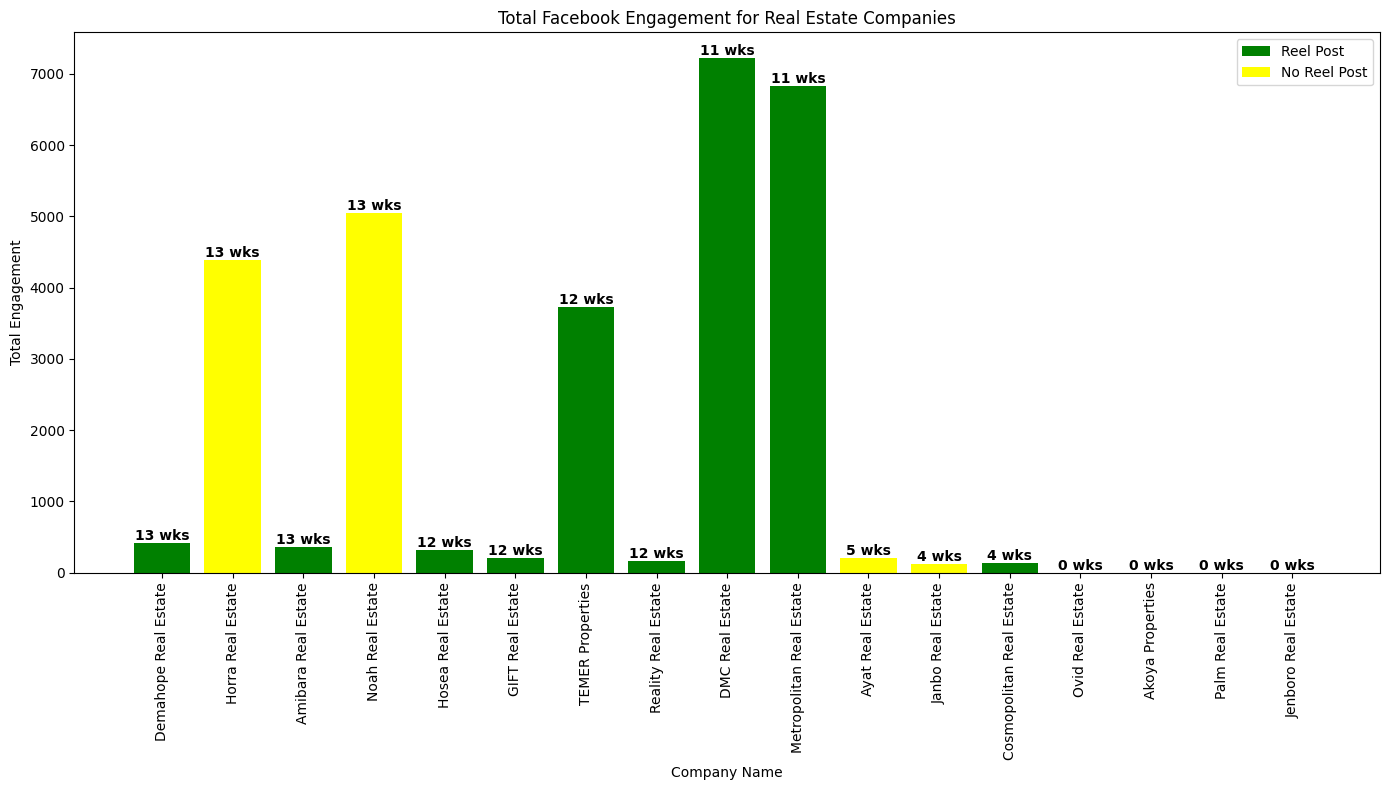

In [23]:
import matplotlib.pyplot as plt

# Data for visualization
companies = [
    "Demahope Real Estate", "Horra Real Estate", "Amibara Real Estate",
    "Noah Real Estate", "Hosea Real Estate", "GIFT Real Estate",
    "TEMER Properties", "Reality Real Estate", "DMC Real Estate",
    "Metropolitan Real Estate", "Ayat Real Estate", "Janbo Real Estate",
    "Cosmopolitan Real Estate", "Ovid Real Estate", "Akoya Properties",
    "Palm Real Estate", "Jenboro Real Estate"
]
total_engagement = [
    410, 4388, 365, 5048, 315, 198, 3724, 162, 7223, 6832, 199, 115, 129, 0, 0, 0, 0
]
weeks_posted = [
    13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 5, 4, 4, 0, 0, 0, 0
]
no_reel_post = [
    False, True, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False
]

# Colors for the bars
colors = ['yellow' if no_reel else 'green' for no_reel in no_reel_post]

# Creating the bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(companies, total_engagement, color=colors)

# Adding titles and labels
plt.title('Total Facebook Engagement for Real Estate Companies')
plt.xlabel('Company Name')
plt.ylabel('Total Engagement')
plt.xticks(rotation=90)  # Rotate company names for better readability

# Adding a legend to explain colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Reel Post'),
    Patch(facecolor='yellow', label='No Reel Post')
]
ax.legend(handles=legend_elements, loc='upper right')

# Display the number of weeks posted above each bar for additional info
for bar, week in zip(bars, weeks_posted):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{week} wks', ha='center', va='bottom', color='black', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()
